In [145]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# df = pd.read_csv('data/Test_Data_1102_enumerated.csv')
df = pd.read_csv('./data/Test_Data_1102_enumerated_filledin.csv')

In [136]:
## Standardize scores so PCA won't just weight the larger numbers
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

In [139]:
pca = PCA()
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'cumulative explained variance')

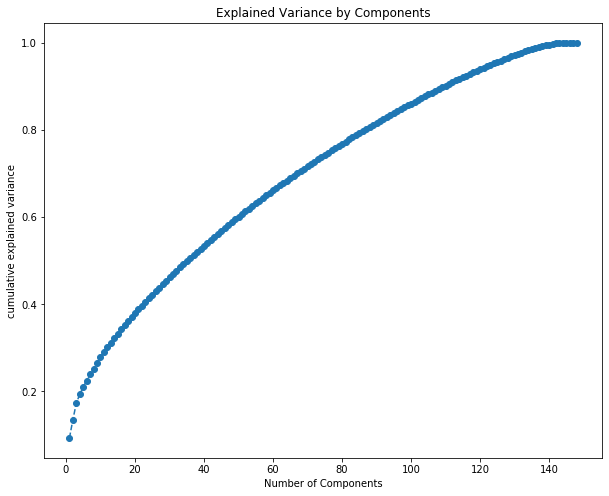

In [142]:
plt.figure(figsize = (10,8))
len_rat = len(pca.explained_variance_ratio_)+ 1
plt.plot(range(1, len_rat), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('cumulative explained variance')

### We want to keep around 80% of the variance- so choose 100

In [161]:
n_components = 60
pca = PCA(n_components = n_components)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)

### Kmeans with PCA

In [162]:
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)


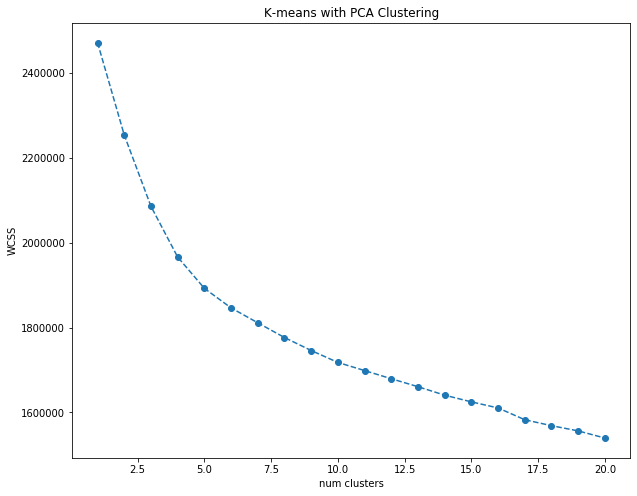

In [163]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('num clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [172]:
## Pick the elbow from above- about 5?
## And fit!
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [173]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-n_components:] = ["Component " + str(i) for i in range(1, n_components + 1)]
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [174]:
df_segm_pca_kmeans.head()

,RedCapID,CaseCtrl,indexredcapid,Female,Age,Race,Spanish,Month_Birth,Year_Birth,Month_Death,...,Component 52,Component 53,Component 54,Component 55,Component 56,Component 57,Component 58,Component 59,Component 60,Segment K-means PCA
0,25,0,1221372,1.0,98.564380,5.0,0.0,9.0,1903.0,4.0,...,-0.212206,-0.066732,0.324336,0.159792,-0.088553,0.048068,0.244728,0.246658,0.218997,3
1,210,0,1229858,0.0,88.608220,5.0,0.0,6.0,1918.0,1.0,...,0.290448,-0.011933,-0.301576,0.313836,-0.445181,-0.233027,-0.393540,0.309584,-0.153859,3
2,500,0,1235588,1.0,35.039304,5.0,0.0,7.0,1957.0,1.0,...,-0.266472,-0.002754,0.557288,-0.187981,0.334858,0.355704,0.764349,-0.178050,0.202270,3
3,507,0,1220463,0.0,35.039304,5.0,0.0,10.0,1938.0,1.0,...,0.272557,0.190685,-0.509173,-0.012269,-0.010512,0.070905,0.110826,-0.144815,-0.246062,3
4,610,0,1219461,1.0,35.039304,5.0,0.0,7.0,1950.0,1.0,...,-0.130835,0.062274,0.402648,-0.199323,0.331982,0.403366,0.889592,-0.230605,0.149104,3


In [175]:
# df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first'})

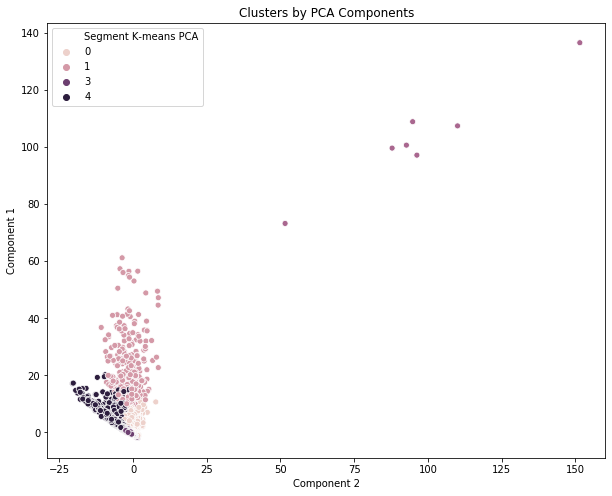

In [176]:
import seaborn as sns

x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue=df_segm_pca_kmeans['Segment K-means PCA'])
plt.title('Clusters by PCA Components')
plt.show()

## Kmeans Clustering (OLD no PCA)

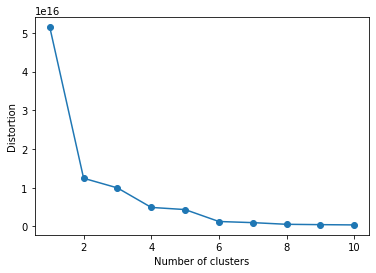

In [177]:
# Convert DataFrame to matrix
mat = df.values
mat[mat == np.nan] = -1
mat = mat.astype('int')

#how many clusters? 
distortions = []
for i in range(1, 11):
    km = sklearn.cluster.KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(mat)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [178]:
# Using sklearn
km = sklearn.cluster.KMeans(n_clusters=7)
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_
# Format results as a DataFrame
results = pd.DataFrame([df.index,labels], ["index", "label"]).T
results

,index,label
0,0,5
1,1,5
2,2,5
3,3,5
4,4,5
...,...,...
25484,25484,1
25485,25485,1
25486,25486,1
25487,25487,1


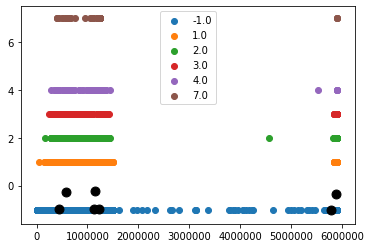

In [179]:
##TODO: plot, figure out important features of clustering

#Getting the Centroids
centroids = km.cluster_centers_

featureX = 'RedCapID'
featureXInd = 0
featureY = 'methoddeath'
featureYInd = 13
u_labels = np.unique(df[featureY]) 

#plotting the results:
for i in u_labels:
    x = df.loc[df[featureY] == i, featureX] #df.loc[df[feature] == i].index
    y = df.loc[df[featureY] == i, featureY]
    plt.scatter(x, y, label=i)
plt.scatter(centroids[:,featureXInd] , centroids[:,featureYInd] , s = 80, color = 'k')
plt.legend()
plt.show()

## Hierarchical Clustering

In [180]:
# https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cluster.fit_predict(mat)

### Working on some visualizations of the clustering